In [1]:
### To build the relation between mpg and other attributes 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/auto-mpg.csv")

In [3]:
df.shape

(398, 9)

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [6]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [7]:
##### There are no missing values

In [8]:
##### checking for duplicates

In [9]:
duplicate=df.duplicated()
print(duplicate.sum())

0


In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.shape

(398, 9)

In [13]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [14]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [15]:
df["horsepower"]=df["horsepower"].replace("?",np.nan)

In [16]:
df["horsepower"]=df["horsepower"].astype(float)

In [17]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [18]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [19]:
median1=df["horsepower"].median()
median1

93.5

In [20]:
df["horsepower"].replace(np.nan,median1,inplace=True)

In [21]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [22]:
##checking for duplicates
duplicate=df.duplicated()
print(duplicate.sum())

0


In [23]:
df.drop_duplicates(inplace=True)

In [24]:
df.duplicated().sum()

0

In [25]:
df.shape

(398, 9)

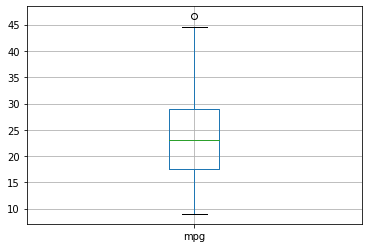

In [26]:
#Outlier
df.boxplot(column="mpg")

In [27]:
def remove_outlier(col):
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  IQR=Q3-Q1
  lower_range=Q1-1.5*IQR
  upper_range=Q3+1.5*IQR
  return lower_range,upper_range

In [28]:
low_mpg,high_mpg=remove_outlier(df["mpg"])
df["mpg"]=np.where(df["mpg"]>high_mpg,high_mpg,df["mpg"])
df["mpg"]=np.where(df["mpg"]<low_mpg,low_mpg,df["mpg"])

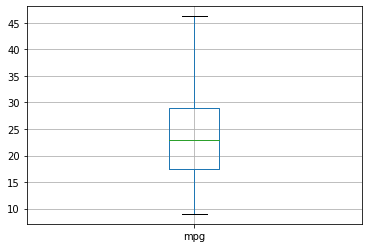

In [29]:
df.boxplot(column=["mpg"])

In [30]:
pd.get_dummies(df)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name_amc ambassador brougham,car name_amc ambassador dpl,...,car name_volvo 145e (sw),car name_volvo 244dl,car name_volvo 245,car name_volvo 264gl,car name_volvo diesel,car name_vw dasher (diesel),car name_vw pickup,car name_vw rabbit,car name_vw rabbit c (diesel),car name_vw rabbit custom
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,0,0,...,0,0,0,0,0,0,0,0,0,0
394,44.0,4,97.0,52.0,2130,24.6,82,2,0,0,...,0,0,0,0,0,0,1,0,0,0
395,32.0,4,135.0,84.0,2295,11.6,82,1,0,0,...,0,0,0,0,0,0,0,0,0,0
396,28.0,4,120.0,79.0,2625,18.6,82,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
df.drop("car name",axis=1,inplace=True)

In [32]:
df['origin']=df['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
300,23.9,8,260.0,90.0,3420,22.2,79,america
138,14.0,8,318.0,150.0,4457,13.5,74,america
296,27.4,4,121.0,80.0,2670,15.0,79,america
8,14.0,8,455.0,225.0,4425,10.0,70,america
4,17.0,8,302.0,140.0,3449,10.5,70,america
211,16.5,6,168.0,120.0,3820,16.7,76,europe
256,20.5,6,225.0,100.0,3430,17.2,78,america
132,25.0,4,140.0,75.0,2542,17.0,74,america
225,17.5,6,250.0,110.0,3520,16.4,77,america
250,19.4,8,318.0,140.0,3735,13.2,78,america


In [33]:
### one hot encoding
df = pd.get_dummies(df, columns=['origin'])
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
109,21.0,4,140.0,72.0,2401,19.5,73,1,0,0
299,27.2,4,141.0,71.0,3190,24.8,79,0,0,1
291,19.2,8,267.0,125.0,3605,15.0,79,1,0,0
191,22.0,6,225.0,100.0,3233,15.4,76,1,0,0
381,36.0,4,107.0,75.0,2205,14.5,82,0,1,0
48,18.0,6,250.0,88.0,3139,14.5,71,1,0,0
344,39.0,4,86.0,64.0,1875,16.4,81,1,0,0
265,17.5,8,318.0,140.0,4080,13.7,78,1,0,0
353,33.0,4,105.0,74.0,2190,14.2,81,0,0,1
123,20.0,6,156.0,122.0,2807,13.5,73,0,1,0


In [ ]:
sns.pairplot(df, diag_kind="kde")

In [ ]:
##building a linear model
#independent variables
X = df.drop(['mpg'], axis=1)
# the dependent variable
y=df[['mpg']]

In [ ]:
#split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=1)

In [ ]:
##fit linear model
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

In [ ]:
model_1.score(X_train, y_train)

In [ ]:
#out of sample score
model_1.score(X_test, y_test)